# Spectra for CalCOFI lines 93 and 90

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from netCDF4 import Dataset

from pyspec import spectrum as spec

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days


In [2]:
line93 = np.load('uv_wavenumber_line93.npz')
line90 = np.load('uv_wavenumber_line90.npz')

line93_short = np.load('uv_wavenumber_line93_short.npz')
line90_short = np.load('uv_wavenumber_line90_short.npz')

In [3]:
kr = np.array([1./700,1./5.])

def plot_oned_spec(line):
    """Plots 1d spec for calcofi line """
    
    plt.loglog(line['k'],line['Ev'].real.squeeze(),label='across-track, hourly')
    plt.loglog(line['k'],line['Eu'].real.squeeze(),label='along-track, hourly')
    plt.loglog(line['k'],line['Evd'].real.squeeze(),'b--',label='across-track, daily-averaded')
    plt.loglog(line['k'],line['Eud'].real.squeeze(),'g--',label='along-track,  daily-averaged')
    plt.xlabel('wavenumber [cpkm]')
    plt.ylabel(r'KE spectral density [m$^2$ s$^{-2}$/cpkm]')
    
    plt.loglog(kr,kr**-2/1.e5,color='0.5',linewidth=2)
    plt.text(1./600.,1.2,'-2',fontsize=16)
    
    plt.xlim(1./800,1./5.)
    plt.legend(loc=3)
    
    plot_spec_error(sn=19)

def plot_spec_error(x=0.034,y=0.15, sn=200):
    Erl, Eru = spec.spec_error(y,sn=sn)

    try:
        nx = sn.size
        err=np.array(np.vstack([y-Erl,Eru-y]))        
        plt.errorbar(x, y, yerr=err.squeeze(), color='k',fmt='.')
        plt.text(x[0]-0.001,y[0],r'95 $\%$',fontsize=15)
    except: 
        err=np.array(np.vstack([y-Erl,Eru-y]))[...,np.newaxis]        
        plt.errorbar(x, y, yerr=err, color='k',fmt='.')
        plt.text(x+0.003,y-1.e-3,r'95 $\%$',fontsize=14)    

/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


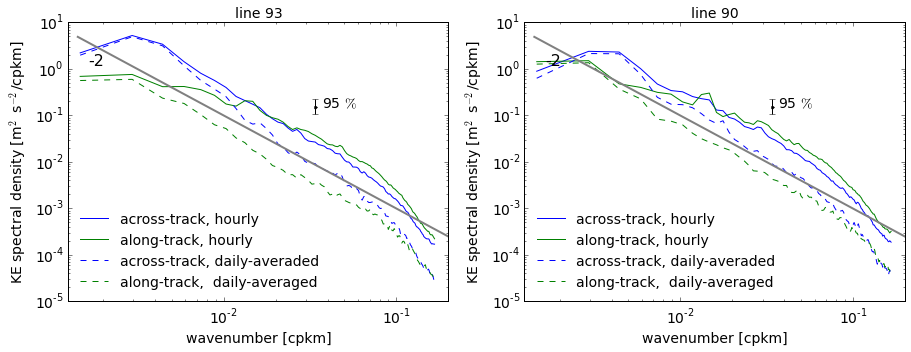

In [4]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plot_oned_spec(line93)
plt.title('line 93')

plt.subplot(122)
plot_oned_spec(line90)
plt.title('line 90')


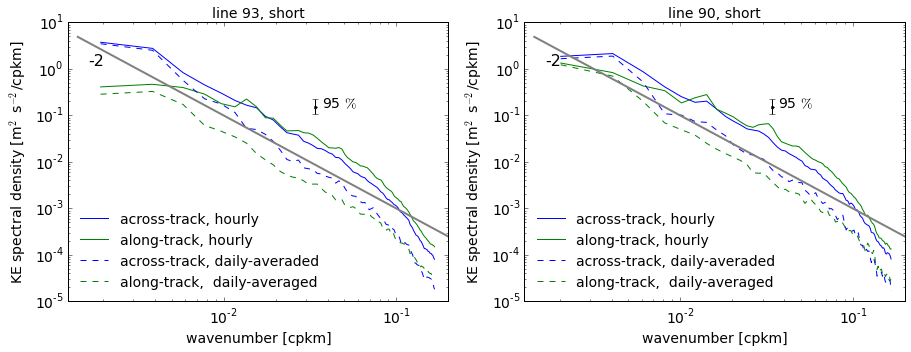

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plot_oned_spec(line93_short)
plt.title('line 93, short')

plt.subplot(122)
plot_oned_spec(line90_short)
plt.title('line 90, short')

In [6]:
fno = Dataset("calcofi_llc4320.nc", "w", format="NETCDF4")

In [7]:
fno.createGroup("line93")
fno.createGroup("line90")
fno.createGroup("line93_short")
fno.createGroup("line90_short")

<type 'netCDF4._netCDF4.Group'>
group /line90_short:
    dimensions(sizes): 
    variables(dimensions): 
    groups: 

In [8]:
def create_variables(line="93"):
    """create dimensions and variables for
        specific line"""
    data=eval("line"+line)
    fno.createDimension("k"+line, data['k'].size)

    ks = fno.createVariable("line"+line+"/k","f8",("k"+line,))
    Eu = fno.createVariable("line"+line+"/Eu","f8",("k"+line,))
    Ev = fno.createVariable("line"+line+"/Ev","f8",("k"+line,))
    Eud = fno.createVariable("line"+line+"/Eud","f8",("k"+line,))
    Evd = fno.createVariable("line"+line+"/Evd","f8",("k"+line,))
    
    ks[:], Eu[:], Ev[:] = data['k'], data['Eu'].real, data['Ev'].real
    Eud[:], Evd[:] = data['Eud'].real, data['Evd'].real
    
    ks.units = "cycles/km"
    ks.description = "Along-track wavenumber"
    Eu.units = u"m^2 s^{-2} / (cycles/km)"
    Eu.description = u"Along-track kinetic energy spectral density"
    Ev.description = u"Along-track kinetic energy spectral density"
    

In [9]:
create_variables(line="90")
create_variables(line="93")
create_variables(line="90_short")
create_variables(line="93_short")

In [10]:
fno.description = "LLC 4320 wavenumber spectra along  CalCOFI lines.\
 The short groups do not include the segments associated\
 with the four stations closest to short."

In [11]:
fno.history = "Created by Cesar Rocha (crocha@ucsd.edu) on " + time.ctime(time.time())

In [12]:
fno

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    description: LLC 4320 wavenumber spectra along  CalCOFI lines. The short groups do not include the segments associated with the four stations closest to short.
    history: Created by Cesar Rocha (crocha@ucsd.edu) on Tue Nov 17 16:13:42 2015
    dimensions(sizes): k90(114), k93(114), k90_short(83), k93_short(87)
    variables(dimensions): 
    groups: line93, line90, line93_short, line90_short

In [13]:
fno.close()